## Importing required Python libraries and other dependencies

In [1]:
# For numerical computations and array handling
import numpy as np  
# For data manipulation and analysis (DataFrames)
import pandas as pd  
# For creating basic visualizations
import matplotlib.pyplot as plt   
# For enhanced and stylish data visualizations
import seaborn as sns                

# Importing machine learning utilities from scikit-learn
# To convert categorical data into numeric form
from sklearn.preprocessing import LabelEncoder
# To split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Importing model and evaluation tools
# XGBoost model for regression tasks
from xgboost import XGBRegressor      
# For evaluating model performance (e.g., R², RMSE)
from sklearn import metrics            

## Loading with Exploring and Pre-Processing Data

In [2]:
# Load dataset from CSV file into a pandas DataFrame
big_mart_data = pd.read_csv('Train.csv')

In [3]:
# Display the first 5 rows to understand data structure and inspect columns
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Display dataset shape to see number of rows (records) and columns (features)
big_mart_data.shape

(8523, 12)

In [5]:
# Display general information: column names, data types, non-null counts, etc.
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Checking and Handling Missing Values in the Dataset

In [6]:
# Check how many missing (null) values exist in each column
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Compute the mean of the 'Item_Weight' column to use for imputation
big_mart_data['Item_Weight'].mean()

np.float64(12.857645184135976)

In [8]:
# Fill missing values in 'Item_Weight' with the calculated mean value
# inplace=True modifies the DataFrame directly
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_17580\4238146631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)


In [9]:
# Check the most frequent (mode) value of 'Outlet_Size' column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
# Fill missing 'Outlet_Size' values based on the mode of each 'Outlet_Type'
# Create a table mapping each 'Outlet_Type' to its most frequent 'Outlet_Size'
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size',
                                                columns='Outlet_Type',
                                                aggfunc=lambda x: x.mode()[0])

In [11]:
# Display the mode table for verification
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
# Identify missing values in 'Outlet_Size'
miss_values = big_mart_data['Outlet_Size'].isnull()

In [13]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [14]:
# Fill missing values by applying the corresponding mode based on 'Outlet_Type'
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values, 'Outlet_Type'].apply(
    lambda x: mode_of_Outlet_size[x]
)

In [15]:
# Verify that no missing values remain
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [16]:
# Generate descriptive statistics for all numerical columns in the dataset
# This will compute metrics such as count, mean, standard deviation, min, max, and quartiles
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Numerical Features

In [17]:
# Use seaborn’s default style settings for nicer plots (sets a style context)
sns.set()

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_17580\552662710.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


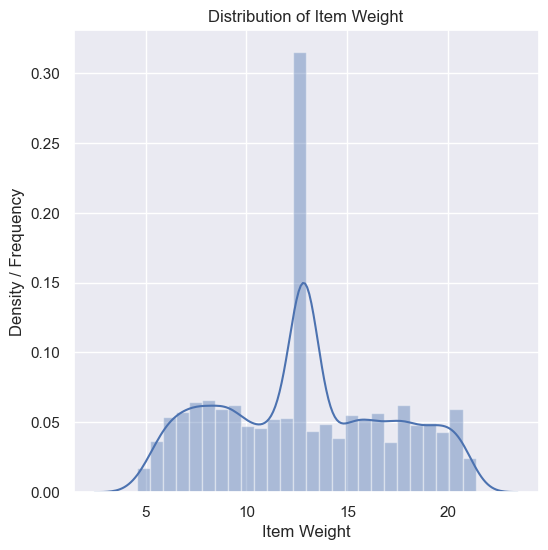

In [18]:
# — Plot distribution (histogram + KDE) of Item_Weight —
# Create a new figure of size 6×6 inches
plt.figure(figsize=(6, 6))      
# Plot histogram + KDE for 'Item_Weight'
sns.distplot(big_mart_data['Item_Weight'])          
plt.title("Distribution of Item Weight") 
 # Label x-axis and y-axis
plt.xlabel("Item Weight")                           
plt.ylabel("Density / Frequency")                
# Display the plot
plt.show()                                          


C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_17580\2647587489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


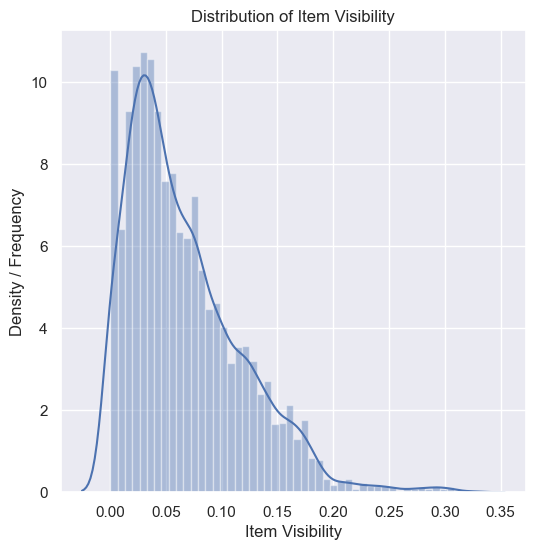

In [19]:
# — Plot distribution of Item_Visibility —
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.title("Distribution of Item Visibility")
plt.xlabel("Item Visibility")
plt.ylabel("Density / Frequency")
plt.show()

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_17580\321114074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


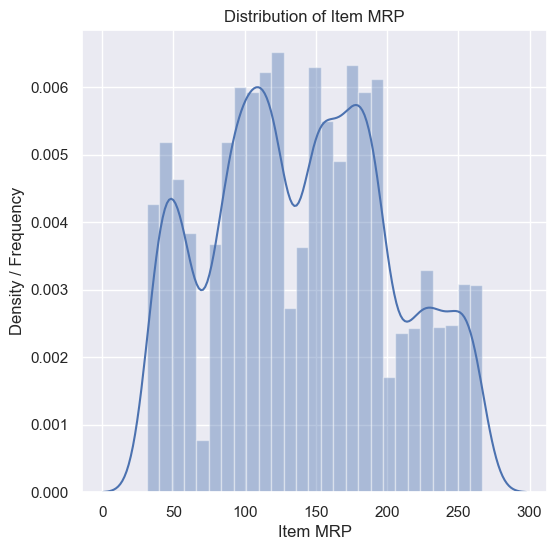

In [20]:
# — Plot distribution of Item_MRP (Maximum Retail Price) —
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_MRP'])
plt.title("Distribution of Item MRP")
plt.xlabel("Item MRP")
plt.ylabel("Density / Frequency")
plt.show()

C:\Users\SYED SARAFEENA ALI\AppData\Local\Temp\ipykernel_17580\775515733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


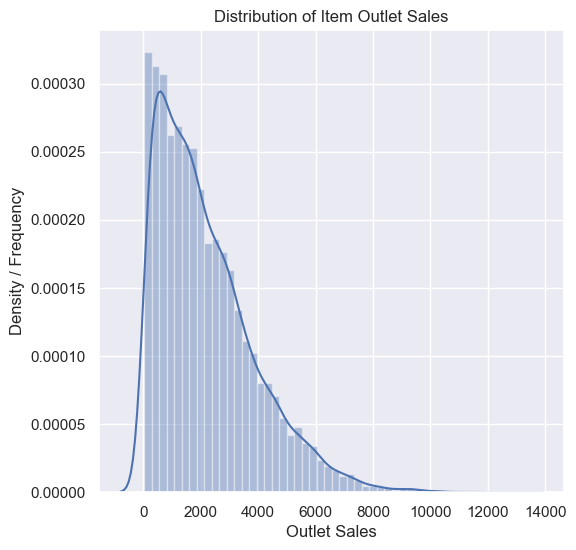

In [21]:
# — Plot distribution of Item_Outlet_Sales (target variable) —
plt.figure(figsize=(6, 6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.title("Distribution of Item Outlet Sales")
plt.xlabel("Outlet Sales")
plt.ylabel("Density / Frequency") 
plt.show()

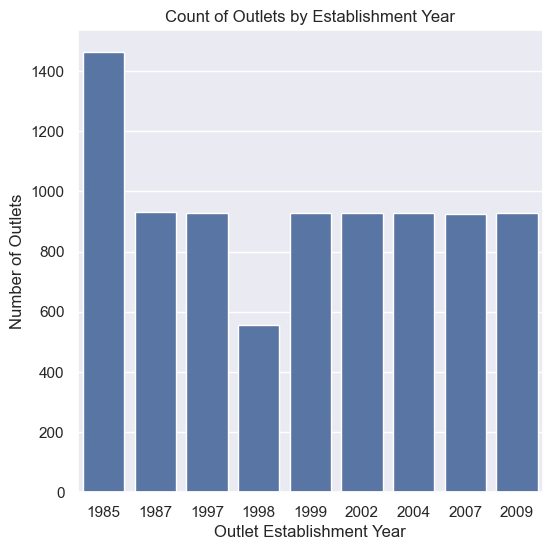

In [22]:
# — Plot count (frequency) of each Outlet_Establishment_Year —
# This shows how many stores were established each year
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.title("Count of Outlets by Establishment Year")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Number of Outlets")
plt.show()

## Caterogical Features

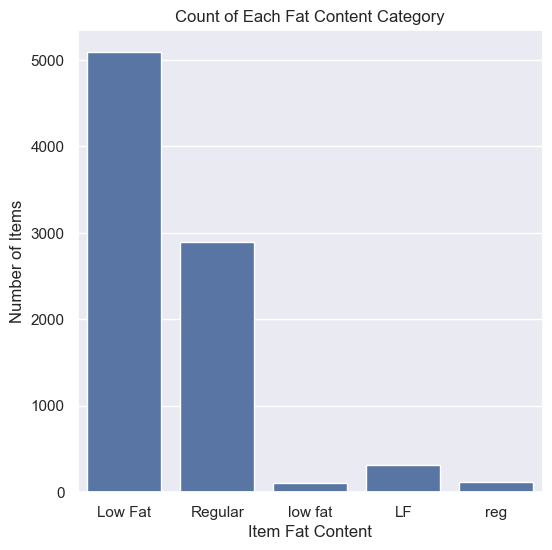

In [23]:
# — Plot count (frequency) of each category in the Item_Fat_Content column —
# Create a new figure of size 6×6 inches
plt.figure(figsize=(6, 6))
# Countplot: bar chart of counts per category
sns.countplot(x='Item_Fat_Content', data=big_mart_data)  
plt.title("Count of Each Fat Content Category")
# Label x-axis and y-axis
plt.xlabel("Item Fat Content")  
plt.ylabel("Number of Items") 
# Display the plot
plt.show()  

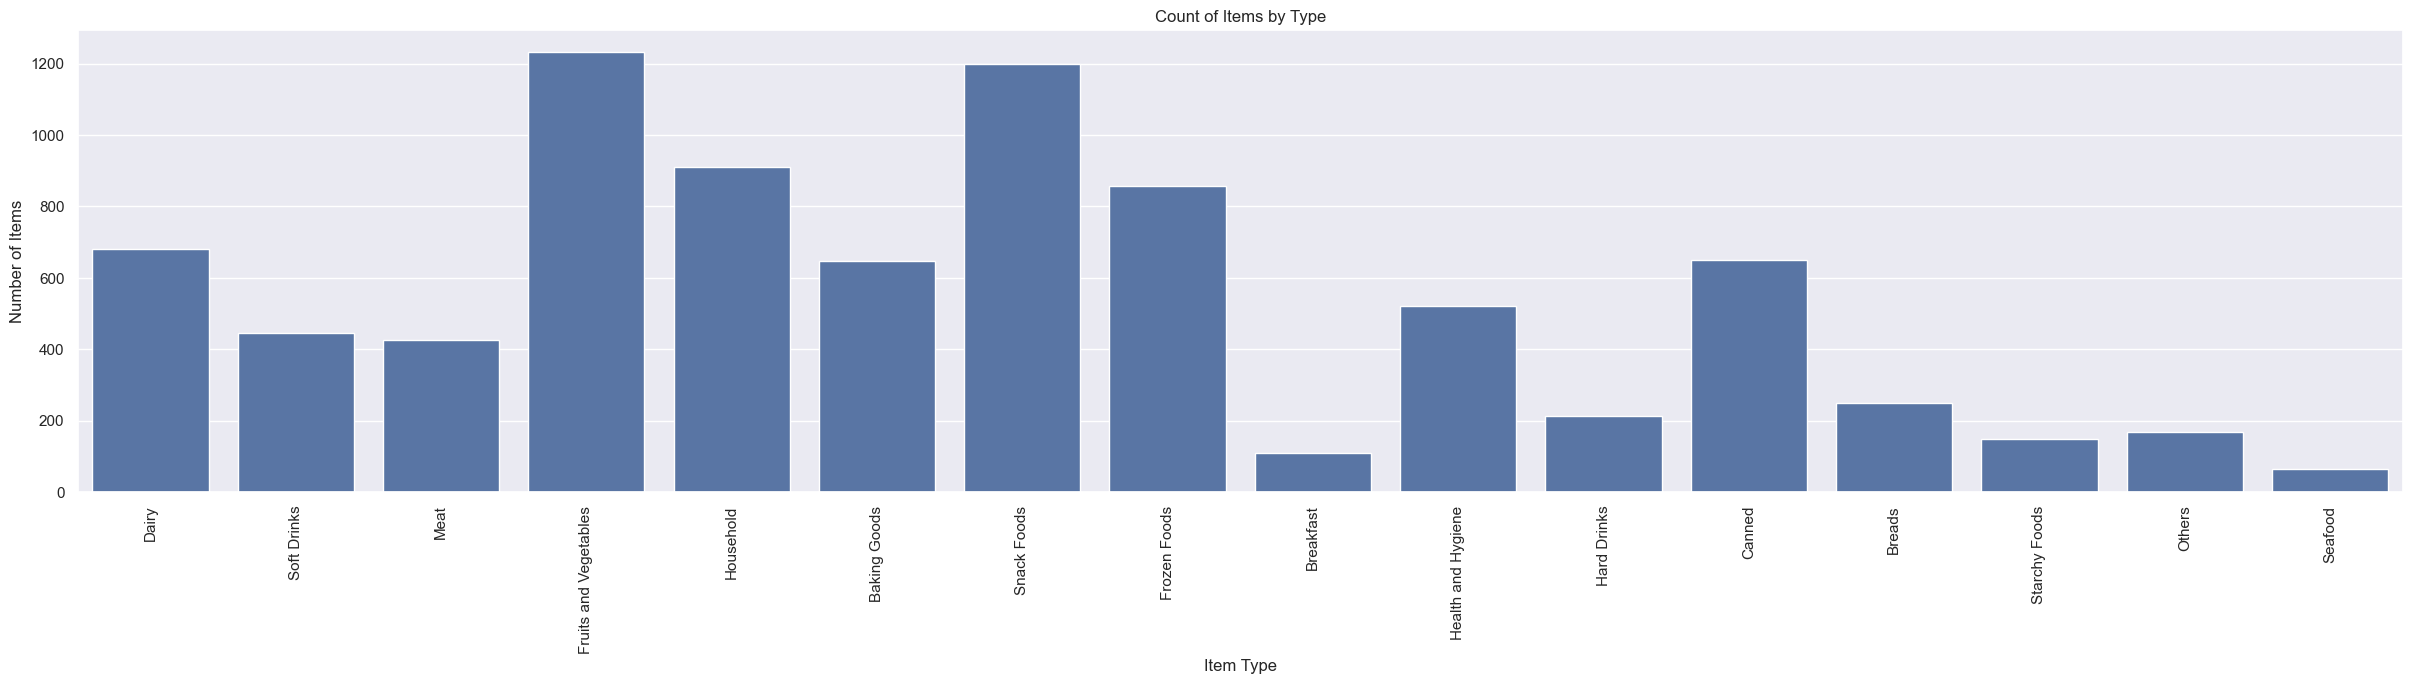

In [24]:
# — Plot counts of each Item_Type (product category) —
 # Wide figure to accommodate many category labels
plt.figure(figsize=(30, 6)) 
sns.countplot(x='Item_Type', data=big_mart_data)
plt.title("Count of Items by Type")
plt.xlabel("Item Type")
plt.ylabel("Number of Items")
# Rotate x-axis labels so they don’t overlap
plt.xticks(rotation=90) 
plt.show()

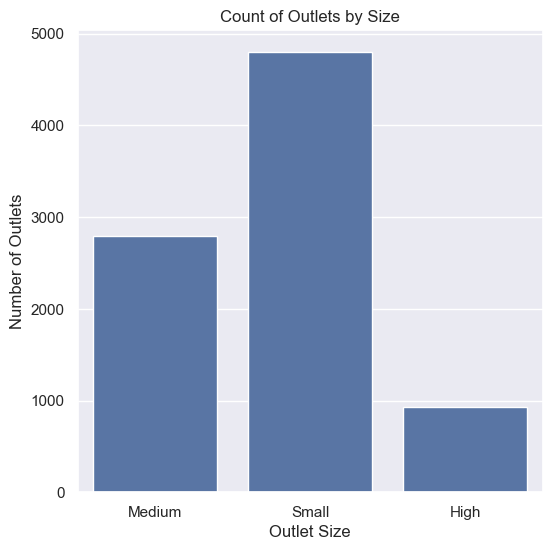

In [25]:
# — Plot counts of each Outlet_Size category —
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.title("Count of Outlets by Size")
plt.xlabel("Outlet Size")
plt.ylabel("Number of Outlets")
plt.show()

## Data Pre-Processing

In [26]:
# Show the first few rows again (to inspect current data state)
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
# Show how many entries of each category exist in 'Item_Fat_Content'
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [28]:
# Clean / standardize the 'Item_Fat_Content' categories:
# Replace variants / typos with a unified naming convention
big_mart_data.replace(
    {'Item_Fat_Content': {
         'low fat': 'Low Fat',   # lowercase → proper case
         'LF': 'Low Fat',        # abbreviation → full form
         'reg': 'Regular'        # shorthand → full form
     }},
    inplace=True
)

In [29]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
# Check again how many entries per category, to see changes
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

## Label Encoding

In [30]:
# Initialize a LabelEncoder instance
encoder = LabelEncoder()

In [31]:
# Encode categorical columns into numeric labels
# The LabelEncoder transforms each unique category (string) into an integer [0, 1, 2, …]

big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [32]:
# Display the first few rows again to inspect the transformed features
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting features and Target

In [33]:
# Split data into input features (X) and target variable (Y)

# X: All columns except the target “Item_Outlet_Sales”
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)

# Y: The target variable we want to predict
Y = big_mart_data['Item_Outlet_Sales']

In [34]:
# Print X to inspect the features (after encoding and preprocessing)
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [35]:
# Print Y to inspect the target values
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## Splitting the data into Training data & Testing Data

In [36]:
# Split the data into training and test sets
#   - test_size=0.2 means 20% of the data will be used as test/validation set
#   - random_state=2 ensures reproducibility (same split each run)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Print shapes to verify dimensions
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## Machine Learning Model Training - XGBoost Regressor

In [37]:
# Instantiate the XGBoost regressor (using default hyperparameters)
regressor = XGBRegressor()

# Train / fit the model on the training data
# X_train: features; Y_train: target values
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Evaluation

In [38]:
# — Make predictions on the training data —
training_data_prediction = regressor.predict(X_train)

In [39]:
# — Compute R² (coefficient of determination) on training data —
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value on training data =', r2_train)

R Squared value on training data = 0.8762174618111388


In [40]:
# — Make predictions on the test (unseen) data —
test_data_prediction = regressor.predict(X_test)

In [41]:
# — Compute R² on test data to evaluate generalization —
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value on test data =', r2_test)

R Squared value on test data = 0.5017253991620692
